# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


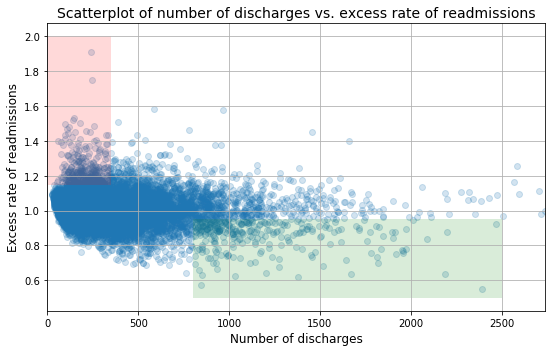

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Comments on conclusions and recommendations
The crux of the analysis report is the following:   
      
    1- There is a strong correlation between hospital capacity and the readmission rate and therefore,   
       
    2- There is a need to upgrade resources for smaller capacity hospitals, and there is a need to consolidate smaller hospitals into few larger ones.
   
The problem with this analysis is the following:
    
    1- There is a need to test if there is a correlation between capacity and readmission rates or not. Without this any conclusion or recommentation can not be made.    
       
    2- If a correlation is found, then the only recommendation that is reasonable is to concolidate smaller capacity hospitals into few larger ones. Upgrading resources for smaller capacity hospitals might be beneficial, but this cannot be concluded from a correlation, if any, between hospital capacity and readmission rates. 

We need to calculate the correlation between readmission rate and hospital capacity.

In [5]:
# Perform 10000 pairs bootstrap for correlation

# Set up array of indices to sample from: 
inds = np.arange(len(x))

# convert x and y to numpy array
x = np.array(x)
y = np.array(y)

# Initialize replicates
bs_corr = np.empty(10000)
    
# Generate replicates
for i in range(10000):
    bs_inds = np.random.choice(inds, size=len(inds))
    bs_x = x[bs_inds]
    bs_y = y[bs_inds]
    bs_corr[i] = np.corrcoef(bs_x, bs_y)[0,1]

Let,s visualize the bootstrap correlation values.

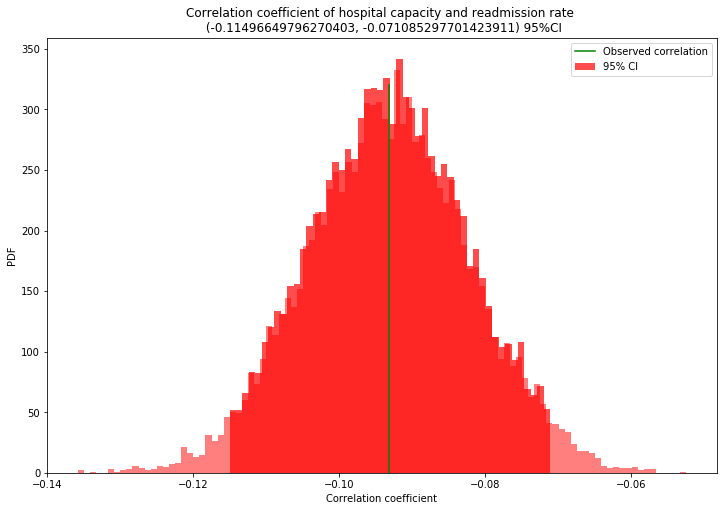

In [6]:
# bs_coor with 95% CI
bs_corr95 = bs_corr[np.logical_and(bs_corr >= np.percentile(bs_corr, 2.5), bs_corr <= np.percentile(bs_corr, 97.5))]

# 95CI for correlation coefficient
corr_coeff_95 = np.percentile(bs_corr,
                              [2.5, 97.5])
# raw correlation of x and y
raw_corr = np.corrcoef(x, y)[0,1]

# plotting correlation data
fig = plt.figure(figsize = (12,8))

plt.hist(bs_corr,
         bins = int(np.sqrt(len(bs_corr))),
         alpha = 0.5,
         color = 'red');

plt.hist(bs_corr95,
         bins = 50,
         alpha = 0.7,
         color = 'red',
         label = '95% CI');

plt.plot([raw_corr, raw_corr],
         [0, 320],
         label = 'Observed correlation',
         color = 'green')

# labelling axis and legend

plt.xlabel('Correlation coefficient')
plt.ylabel('PDF')
plt.title('Correlation coefficient of hospital capacity and readmission rate \n {} 95%CI'.
          format((corr_coeff_95[0], corr_coeff_95[1])))
plt.legend();

** The confidence interval for correlation coefficient shows that there is a weak, but statistically significant, correlation between hospital capacity and readmission rate. ** 

To quantify this further we will calculate the confidence interval for slope of linear fit between the data.

In [7]:
# Perform 10000 pairs bootstrap for linear regression

# Set up array of indices to sample from: 
inds = np.arange(len(x))

# Initialize replicates
bs_slope = np.empty(10000)
bs_intercept = np.empty(10000)
    
# Generate replicates
for i in range(10000):
    bs_inds = np.random.choice(inds, size=len(inds))
    bs_x = x[bs_inds]
    bs_y = y[bs_inds]
    bs_slope[i], bs_intercept[i] = np.polyfit(bs_x, bs_y, 1)

print('The 95% CI for slope of linear fit is {} '.format(np.percentile(bs_slope, [2.5, 97.5])))

The 95% CI for slope of linear fit is [ -3.55797923e-05  -2.16847899e-05] 


** The 95% CI of the slope also shows that there is a weak, but statistically significant, linear relationship between hospital capacity and readmission rate. **    
    
But as the slope value and correlation coefficient value is very low we need to calculate a p-value for the slope. To do this we generate random data sets which should have no correlation with each other and calculate the slope for 10000 replicates.

In [8]:
# Initialize replicates
bs_slope_r = np.empty(10000)
bs_intercept_r = np.empty(10000)
    
# Generate replicates
for i in range(10000):
    x_r , y_r = np.random.random(len(x)), np.random.random(len(x))
    bs_slope_r[i], bs_intercept_r[i] = np.polyfit(x_r, y_r, 1)

Now we calculate the probability of getting a slope value <= the actual slope value.

In [9]:
slope, intercept = np.polyfit(x, y, 1)

pval = np.sum(bs_slope_r <= slope) / len(bs_slope_r)

print('p-value = {} '.format(pval))

p-value = 0.5076 


The p-value of 0.5066 shows that the correlation and linear reltionship we see is not statistically significant.

** This means that we conclude, based on this statistcal test, that: **  

  ** - There is no correlation between hospital capacity and readmission rate and therefore,**

  ** - consolidating smaller capacity hospitals into larger ones will yield no benifit. **

But we also need to look at slope and interpret it to see what it means in practice

In [10]:
change_per_unit = (-1)*(1/slope)/10

print('To reduce readmission ratio by 0.1 hospital capacity needs to increase by {} '.format(change_per_unit))

To reduce readmission ratio by 0.1 hospital capacity needs to increase by 3500.7811887017006 


As shown, to achieve a decrease of 0.1 in readmission ratio the hospital capacity needs to increase by around 3500. This means that increasing hospital capacity will yield limiting decrease in readmission ratio.

Finally we will regenerate the first figure to make it more informative. We will plot the bootstrap regression lines and extend the shaded areas.

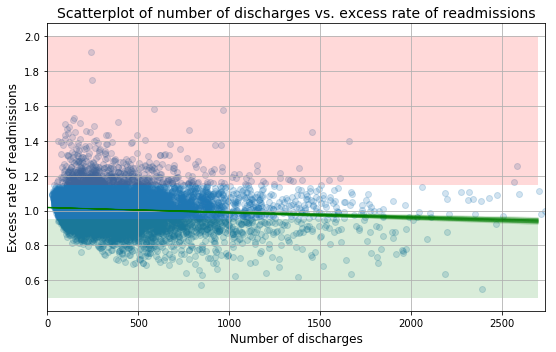

In [11]:
fig, ax = plt.subplots(figsize=(8,5))

# Generate array of x-values for bootstrap lines
xx = np.array([0, 2700])

# Plot the bootstrap lines
for i in range(100):
    ax.plot(xx, bs_slope[i] * xx + bs_intercept[i],
                 linewidth = 0.5, alpha = 0.15, color = 'green')

# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,2700], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([0,2700], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

The regression line (green line)shows that there is a very small rate of change in readmission rates as number of discharges increases. This is consistent with all the findings of this analysis. This figure with the regression line just makes the conclusions, already derived, more clearer.